In [6]:
import numpy as np
import os
from numpy import linalg 
from PIL import Image
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
def load_imager(filename):
    isExit = os.path.isfile(filename)
    if isExit == False:
        print("No image on path");
    img = Image.open(filename);
    return img
imageset_a = np.matrix(np.zeros([190,193*162]));
print(type(imageset_a));
for i in range(0,190):#remember the last digit of number will not be reached
    pathname = 'facehub/'+str(i+1)+'a.jpg';
    kamikaze = np.matrix(load_imager(pathname));
    imageset_a[i,:] = kamikaze.reshape([1,193*162]);

#meanmatrix = meanmatrix/(i+1);#the mean of all matrix, used for making covariance matrix.
#print(meanmatrix);
#plt.imshow(imageset_a[10,:].reshape([193,162]));
imageset_a = imageset_a.T;
print(imageset_a.shape)
#mean(FaceMat,1)
meanmatrixfunc = np.mean(imageset_a,1);

#for i in range(0,190):
#    imageset_a[i] = imageset_a[i]-meanmatrixfunc;
    
imageset_a = imageset_a - meanmatrixfunc;
print(imageset_a);


<class 'numpy.matrix'>
(31266, 190)
[[  99.47894737  -89.52105263  -25.52105263 ...  -96.52105263
   -58.52105263   23.47894737]
 [  98.25789474 -101.74210526  -49.74210526 ... -133.74210526
   -57.74210526   24.25789474]
 [  99.67894737 -120.32105263  -57.32105263 ... -133.32105263
   -56.32105263   32.67894737]
 ...
 [   4.12105263  -60.87894737   -7.87894737 ...  -59.87894737
   -57.87894737   39.12105263]
 [   8.2         -61.8          -8.8        ...  -60.8
   -58.8          44.2       ]
 [   7.25263158  -62.74736842   -7.74736842 ...  -61.74736842
   -59.74736842   37.25263158]]


In [12]:
eig_vals,eig_Vects = linalg.eig(np.dot(np.transpose(imageset_a),imageset_a));
U, eig_svd, VT =  linalg.svd(np.dot(np.transpose(imageset_a),imageset_a));
eig_Vects = np.dot(imageset_a,eig_Vects).T;

print(eig_Vects);
for i in range(0,eig_Vects.shape[0]):
    eig_Vects[i,:] = eig_Vects[i,:]/(np.linalg.norm(eig_Vects[i,:], ord=2))
eig_Vects = eig_Vects.T;

#eig_Vects = np.dot(imageset_a,eig_Vects).T;
print(eig_Vects);
print(eig_Vects.shape)

position_of_eigval= np.argsort(-eig_vals);
eig_vals_sorted = eig_vals[position_of_eigval];

sum_val = sum(eig_vals);
i = 0;
probability = 0;
ratio = 0;
while (ratio<=0.95):
    probability += eig_vals_sorted[i];
    ratio =  probability / sum_val;
    i = i+1;
;#number of eigenvalues to pick
print(i);

eig_valsIndex = position_of_eigval[:i]

[[ 101.39493503  128.51457645  117.85706011 ... -208.80060199
  -222.58857353 -237.35800195]
 [ 102.29219849   91.4010086    84.72590801 ...   91.24547184
    83.29704464   71.06128489]
 [-454.53459075 -441.03922006 -430.51834403 ... -524.53375668
  -523.66235316 -524.03768343]
 ...
 [  -9.48293825   -5.74063956  -16.21037536 ...  -23.86124334
   -43.69892352  -53.14121821]
 [ -34.52063728  -16.11795659   18.51073701 ...    3.14049118
     9.11879091   16.28502395]
 [ -44.50254178  -39.08370147  -46.82765463 ...  -28.32208038
   -29.47513199  -32.23007092]]
[[ 0.00261425  0.00380421 -0.01814211 ... -0.00483273 -0.01722626
  -0.02327896]
 [ 0.00331348  0.00339917 -0.01760346 ... -0.00292557 -0.00804308
  -0.0204444 ]
 [ 0.0030387   0.00315093 -0.01718354 ... -0.00826119  0.00923711
  -0.02449521]
 ...
 [-0.00538348  0.00339339 -0.02093603 ... -0.01216026  0.00156715
  -0.01481507]
 [-0.00573898  0.00309779 -0.02090125 ... -0.02227002  0.0045504
  -0.01541823]
 [-0.00611978  0.00264275 -

In [13]:
print(U)
print(eig_svd)
print(VT)
print(U.shape)
print(eig_svd.shape)
print(VT.shape)

[[-0.02596069  0.14184305 -0.05927034 ...  0.12489338 -0.11056412
   0.07254763]
 [-0.04111764 -0.12200856  0.03869755 ... -0.04016344  0.05389374
   0.07254763]
 [-0.03549115  0.12564113  0.0287449  ...  0.03141906  0.03906295
   0.07254763]
 ...
 [-0.05401348 -0.06918685  0.10853652 ...  0.01255383 -0.02645657
   0.07254763]
 [ 0.09237586 -0.09119716  0.02915804 ...  0.13871195  0.01301341
   0.07254763]
 [-0.1237355  -0.04177275 -0.13085481 ...  0.03038696  0.01116342
   0.07254763]]
[1.50430809e+09 7.23028440e+08 6.27708691e+08 5.95937038e+08
 4.79154742e+08 3.61458191e+08 3.33029069e+08 2.83375374e+08
 2.46909306e+08 2.16979511e+08 1.92248100e+08 1.80354888e+08
 1.71871043e+08 1.38364712e+08 1.27754064e+08 1.23155651e+08
 1.12156176e+08 9.99760729e+07 9.66400326e+07 9.48701002e+07
 8.69056087e+07 8.28895183e+07 7.41274166e+07 6.81675769e+07
 6.47089957e+07 6.16047121e+07 6.01355741e+07 5.75166676e+07
 5.51902512e+07 5.09286405e+07 4.91210719e+07 4.53086310e+07
 4.42009505e+07 4.31

(31266, 96)
[[ 0.00261425  0.00380421 -0.01814211 ...  0.00167368 -0.00336441
   0.0143051 ]
 [ 0.00331348  0.00339917 -0.01760346 ... -0.00303863 -0.0008872
   0.01737964]
 [ 0.0030387   0.00315093 -0.01718354 ... -0.00479038 -0.00165618
   0.00728693]
 ...
 [-0.00538348  0.00339339 -0.02093603 ...  0.00946828 -0.00507597
  -0.00310285]
 [-0.00573898  0.00309779 -0.02090125 ...  0.01120521 -0.00125264
  -0.00300015]
 [-0.00611978  0.00264275 -0.02091623 ...  0.01339954 -0.00261522
  -0.00278837]]
(31266, 96)


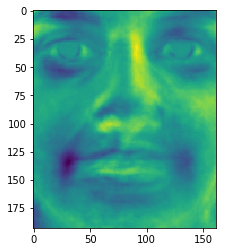

In [3]:
Transformer = eig_Vects[:,eig_valsIndex];
print(Transformer.shape)
plt.imshow(Transformer[:,10].reshape([193,162]));
#for i in range(0,Transformer.shape[0]):
#    print(Transformer.shape[0]);
#    print(sum(Transformer[i,:],1));
#    Transformer[i,:] = Transformer[i,:]/sum(Transformer[i,:],1);
print(Transformer);
print(Transformer.shape);


In [16]:
def msecounter(test):    
    weights = np.dot(Transformer.T,test).T;#(i, 31266) ×(31266,1)=(i,1)

    changeback = np.dot(weights,Transformer.T);#(1,i)×(i,31266) = （1,31266）

    error = 0;
    print("error rate initial:" + str(error));
    difference = test - changeback;
    for countee in range(0,changeback.shape[1]):
        error += np.dot(difference[1,countee],difference[1,countee]);
    error = error/(changeback.shape[1]);
    print(error);
    plt.imshow(changeback.reshape([193,162]));
    return error;
    

In [ ]:
errorholder = np.matrix(np.zeros([1,imageset_a.shape[1]]))
for looper in range(0,imageset_a.shape[1]):
     errorholder[0,looper] = msecounter(imageset_a[:,looper]);

In [17]:
errorholder = np.matrix(np.zeros([1,imageset_a.shape[1]]))
print(errorholder[0,2]);
for looper in range(96,98):
    errorholder[0,looper] = msecounter(imageset_a[:,looper]);
print(errorholder);


0.0


NameError: name 'Transformer' is not defined

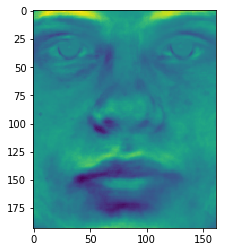

In [4]:
weights = np.dot(Transformer.T,imageset_a[:,150]).T;#(i, 31266) ×(31266,1)=(i,1)

changeback = np.dot(weights,Transformer.T);#(1,i)×(i,31266) = （1,31266）

plt.imshow(changeback.reshape([193,162]));

In [ ]:
errorholder = np.zeros([0,imageset_a.shape[1]]);
print(errorholder.shape)
for counterror in range(0,imageset_a.shape[1]):
    test = imageset_a[:,counterror];
    error = msecounter(test)


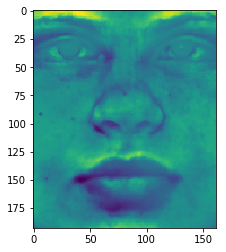

In [5]:
plt.imshow(imageset_a[:,150].reshape([193,162]));

In [ ]:
#The codes underneath is discarded.

In [121]:
Acovariance = np.cov(np.transpose(imageset_a));
print(Acovariance);
print(len(Acovariance));

[[6936.51542746 6945.94461153 6853.41384016 ... 1132.1374826
  1057.30582011 1068.51328321]
 [6945.94461153 7134.05483152 7125.55413534 ...  912.05327207
   825.23386243  813.97153996]
 [6853.41384016 7125.55413534 7311.91225285 ...  869.64753551
   778.78941799  754.62121972]
 ...
 [1132.1374826   912.05327207  869.64753551 ... 5062.54082428
  5133.92275132 5104.35549986]
 [1057.30582011  825.23386243  778.78941799 ... 5133.92275132
  5323.46243386 5346.74814815]
 [1068.51328321  813.97153996  754.62121972 ... 5104.35549986
  5346.74814815 5462.89880256]]
31266


In [122]:
eig_vals, eig_vectors = np.linalg.eig(Acovariance);
eig_vals = sorted(eig_vals, reverse = True)

sum_val = sum(eig_vals)
i = 1
probability = 0;
ratio = 0;
while (ratio<=0.95):
    probability += eig_vals[i];
    ratio = probability / sum_val;
    i = i+1;

i = i-1;

MemoryError: 

In [116]:
#finding covariance
Acovariance = np.dot(np.transpose(imageset_a[0]),imageset_a[0]);
print(type(Acovariance));
for i in range(1,len(imageset_a)):
    print(i);
    Acovariance = Acovariance +  np.dot(np.transpose(imageset_a[i]),imageset_a[i]);
    print(Acovariance.shape());

Acovariance = Acovariance/170;
print(Acovariance);

<class 'numpy.matrix'>
1


MemoryError: 

In [ ]:
plt.imshow(imageset_a[2]);
matrix = numpy.asarray(image)    
image = Image.fromarray(matrix)